In [14]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('data/processed/games_basic.csv')
print(f"Loaded {len(data)} games")
print(f"Columns: {data.columns.tolist()}")


Loaded 26552 games
Columns: ['GAME_DATE_EST', 'SEASON', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away', 'target']


In [10]:
metadata_cols = ['GAME_DATE_EST', 'SEASON', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'target']
feature_cols = [col for col in data.columns if col not in metadata_cols]

X = data[feature_cols]
y = data['target']

print(f"\nFeatures ({len(feature_cols)}):")
for f in feature_cols:
    print(f"  • {f}")


Features (10):
  • FG_PCT_home
  • FT_PCT_home
  • FG3_PCT_home
  • AST_home
  • REB_home
  • FG_PCT_away
  • FT_PCT_away
  • FG3_PCT_away
  • AST_away
  • REB_away


In [11]:
split_idx = int(len(X) * 0.8)

X_train = X.iloc[:split_idx]
X_test = X.iloc[split_idx:]
y_train = y.iloc[:split_idx]
y_test = y.iloc[split_idx:]

print(f"\n{'='*60}")
print(f"DATA SPLIT")
print(f"{'='*60}")
print(f"Training: {len(X_train)} games ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test:     {len(X_test)} games ({len(X_test)/len(X)*100:.1f}%)")
print(f"Train home win rate: {y_train.mean():.3f}")
print(f"Test home win rate:  {y_test.mean():.3f}")


DATA SPLIT
Training: 21241 games (80.0%)
Test:     5311 games (20.0%)
Train home win rate: 0.598
Test home win rate:  0.556


In [12]:
baseline_acc = y_test.mean()  # Always predict home team wins

print(f"\n{'='*60}")
print(f"BASELINE (always predict home win): {baseline_acc:.3f}")
print(f"{'='*60}")
#TODO MAYBE TAKE THIS OUT


BASELINE (always predict home win): 0.556


In [13]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Accuracy
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print(f"\n{'='*60}")
print(f"LOGISTIC REGRESSION RESULTS")
print(f"{'='*60}")
print(f"Training Accuracy:  {train_acc:.3f}")
print(f"Test Accuracy:      {test_acc:.3f}")
print(f"Baseline Accuracy:  {baseline_acc:.3f}")
print(f"Improvement:        {test_acc - baseline_acc:+.3f} ({(test_acc/baseline_acc - 1)*100:+.1f}%)")
print(f"{'='*60}")




LOGISTIC REGRESSION RESULTS
Training Accuracy:  0.840
Test Accuracy:      0.840
Baseline Accuracy:  0.556
Improvement:        +0.285 (+51.2%)



Classification Report:
              precision    recall  f1-score   support

    Away Win       0.85      0.78      0.81      2359
    Home Win       0.84      0.89      0.86      2952

    accuracy                           0.84      5311
   macro avg       0.84      0.83      0.84      5311
weighted avg       0.84      0.84      0.84      5311



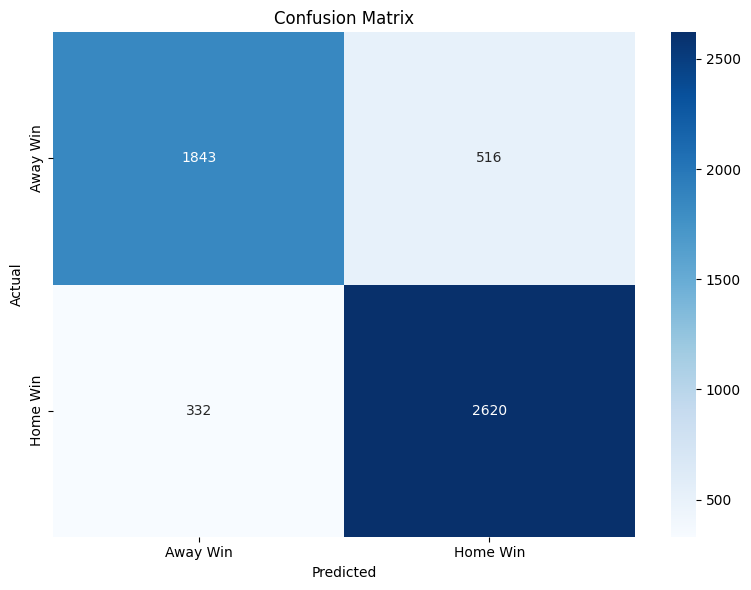


✓ Confusion matrix saved as 'confusion_matrix.png'


In [15]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test, 
                          target_names=['Away Win', 'Home Win']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Away Win', 'Home Win'],
            yticklabels=['Away Win', 'Home Win'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ Confusion matrix saved as 'confusion_matrix.png'")